# Tutorial: Place aerial image behind a CommonRoad scenario

## Preparation: Conversion to CommonRoad

In [1]:
from commonroad.common.file_writer import CommonRoadFileWriter
from commonroad.common.writer.file_writer_interface import OverwriteExistingFile
from commonroad.planning.planning_problem import PlanningProblemSet
from commonroad.scenario.scenario import Tag

from crdesigner.config.gui_config import gui_config

### From Lanelet2

In [2]:
# from crdesigner.map_conversion.map_conversion_interface import lanelet_to_commonroad
#
# scenario_name = "DEU_GarchingCampus-1_1_T-1"
# aerial_map_bounds = [48.26386, 11.65541, 48.26142, 11.66093]
#
# input_path = f"scenarios/Lanelet2_{scenario_name}.osm"
# cr_file_path = f'scenarios/{scenario_name}.xml'
# # We use this projection method as it aligns well with aerial images
# config = lanelet2_config
# scenario = lanelet_to_commonroad(input_path, config)
#
# writer = CommonRoadFileWriter(
#     scenario=scenario,
#     planning_problem_set=PlanningProblemSet(),
#     author="Sebastian Maierhofer",
#     affiliation="Technical University of Munich",
#     source="CommonRoad Scenario Designer",
#     tags={Tag.URBAN},
# )
# writer.write_to_file(cr_file_path, OverwriteExistingFile.ALWAYS)

### From OpenDrive

In [3]:
from crdesigner.config.opendrive_config import open_drive_config
from crdesigner.map_conversion.map_conversion_interface import opendrive_to_commonroad

scenario_name = "MONAEast"
aerial_map_bounds = [48.178486935349994, 11.592628612710614, 48.17294221173529, 11.597618640822715]

input_path = f"scenarios/{scenario_name}.xodr"
cr_file_path = f"scenarios/{scenario_name}.xml"
# We use this projection method as it aligns well with aerial images
open_drive_config.proj_string = gui_config.pseudo_mercator
scenario = opendrive_to_commonroad(input_path)

writer = CommonRoadFileWriter(
    scenario=scenario,
    planning_problem_set=PlanningProblemSet(),
    author="Sebastian Maierhofer",
    affiliation="Technical University of Munich",
    source="CommonRoad Scenario Designer",
    tags={Tag.URBAN},
)
writer.write_to_file(cr_file_path, OverwriteExistingFile.ALWAYS)

/media/sebastian/TUM/06_code/internal/scenario-designer/crdesigner/map_conversion/sumo_map/cr2sumo/converter.py:34: UserWarning: Unable to import commonroad_dc.pycrccosy, converting static scenario into interactive is not supported!
  warnings.warn(
20-Jun-23 09:53:01 - WARNING - Cannot import SUMO, simulation will not be offered in Scenario Designer
20-Jun-23 09:53:03 - WARNING - ConversionLanelet::lanelet_type: Unknown lane type: {<LaneletType.UNKNOWN: 'unknown'>}
20-Jun-23 09:53:03 - WARNING - ConversionLanelet::lanelet_type: Unknown lane type: {<LaneletType.UNKNOWN: 'unknown'>}
20-Jun-23 09:53:04 - WARNING - ConversionLanelet::lanelet_type: Unknown lane type: {<LaneletType.UNKNOWN: 'unknown'>}
20-Jun-23 09:53:04 - WARNING - ConversionLanelet::lanelet_type: Unknown lane type: {<LaneletType.UNKNOWN: 'unknown'>}
20-Jun-23 09:53:04 - WARNING - ConversionLanelet::lanelet_type: Unknown lane type: {<LaneletType.UNKNOWN: 'unknown'>}
20-Jun-23 09:53:04 - WARNING - ConversionLanelet::lanelet

Replace file scenarios/MONAEast.xml


## Plot scenario with aerial image as background

### Imports and scenario loading

In [4]:
import matplotlib.pyplot as plt
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer

from crdesigner.config.gui_config import gui_config as config_settings
from crdesigner.ui.gui.utilities.aerial_data import get_aerial_image_bing, get_aerial_image_ldbv

scenario, _ = CommonRoadFileReader(cr_file_path).open()

### Aerial image from Bing

#### Download image

In [5]:
# If you do not have a Bing key yet, go to https://www.bingmapsportal.com/Application and create one
config_settings.BING_MAPS_KEY = ""
image_bing, extent = get_aerial_image_bing(aerial_map_bounds)

loading 126 tiles


#### Plot scenario

(48.1789071002632, 11.591949462890625, 48.172496660384745, 11.598129272460925)
(1290409.9115103455, 1291097.8447649106, 6135600.260451098, 6136670.378847091)


/home/sebastian/.cache/pypoetry/virtualenvs/commonroad_scenario_designer-gE1u0I92-py3.10/lib/python3.10/site-packages/shapely/linear.py:90: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


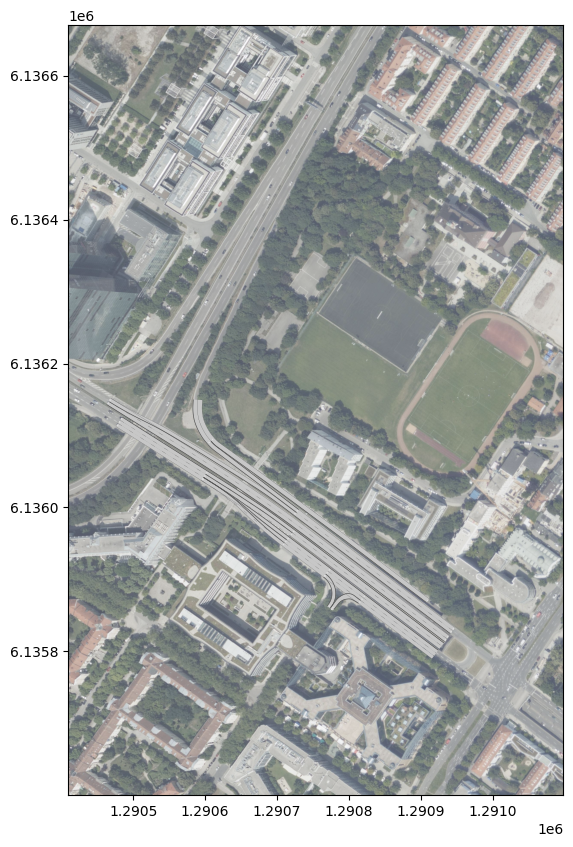

In [6]:
from crdesigner.ui.gui.utilities.aerial_data import get_aerial_image_limits

image_limits = get_aerial_image_limits(extent, scenario)
print(extent)
print(image_limits)

fig = plt.figure(figsize=(25, 10))
ax = plt.axes()
rnd = MPRenderer()
scenario.lanelet_network.draw(rnd)
rnd.render()
ax.imshow(image_bing, aspect="equal", extent=image_limits, alpha=0.75)
plt.show()

### Aerial image from LDBV
see https://geodatenonline.bayern.de/geodatenonline/seiten/wms_dop20cm?36

#### Download image

In [7]:
# LDBV is a charged service
config_settings.LDBV_USERNAME = ""
config_settings.LDBV_PASSWORD = ""

image_ldbv = get_aerial_image_ldbv(aerial_map_bounds)

#### Plot scenario

/home/sebastian/.cache/pypoetry/virtualenvs/commonroad_scenario_designer-gE1u0I92-py3.10/lib/python3.10/site-packages/shapely/linear.py:90: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


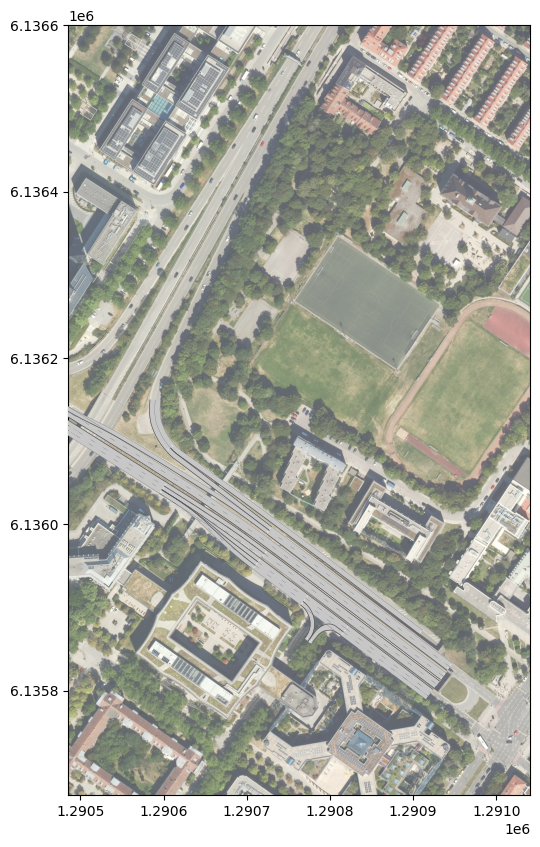

In [8]:
image_limits = get_aerial_image_limits(aerial_map_bounds, scenario)

plt.figure(figsize=(25, 10))
ax = plt.axes()
rnd = MPRenderer()
scenario.lanelet_network.draw(rnd)
rnd.render()
ax.imshow(image_ldbv, aspect="equal", extent=image_limits, alpha=0.75)
plt.show()